In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rzdjafari","key":"0d8b1ff50c65e205d19f937b3d60f4f7"}'}

In [4]:
! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets list

ref                                                             title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
victorsoeiro/netflix-tv-shows-and-movies                        Netflix TV Shows and Movies                           2MB  2022-05-15 00:01:23           9236        283  1.0              
devansodariya/student-performance-data                          Student Performance Dataset                           7KB  2022-05-26 13:55:09           4867        159  0.9705882        
mohamedharris/supermart-grocery-sales-retail-analytics-dataset  Supermart Grocery Sales - Retail Analytics Dataset  191KB  2022-06-12 16:14:44            660         42  0.88235295       
sameepvani/nasa-nearest-earth-objects                       

In [8]:
!kaggle competitions download -c severstal-steel-defect-detection

 99% 1.56G/1.57G [00:08<00:00, 197MB/s]
100% 1.57G/1.57G [00:08<00:00, 193MB/s]


In [9]:
!unzip /content/severstal-steel-defect-detection.zip -d /content/drive

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/train_images/99f75320d.jpg  
  inflating: /content/drive/train_images/99f9d2375.jpg  
  inflating: /content/drive/train_images/99fd3c6f5.jpg  
  inflating: /content/drive/train_images/9a016fe15.jpg  
  inflating: /content/drive/train_images/9a064450d.jpg  
  inflating: /content/drive/train_images/9a08c2783.jpg  
  inflating: /content/drive/train_images/9a18e4457.jpg  
  inflating: /content/drive/train_images/9a1f7c238.jpg  
  inflating: /content/drive/train_images/9a2523ce9.jpg  
  inflating: /content/drive/train_images/9a3e774ff.jpg  
  inflating: /content/drive/train_images/9a5e9e77c.jpg  
  inflating: /content/drive/train_images/9a5f7a855.jpg  
  inflating: /content/drive/train_images/9a62177bb.jpg  
  inflating: /content/drive/train_images/9a67575cf.jpg  
  inflating: /content/drive/train_images/9a6ac5406.jpg  
  inflating: /content/drive/train_images/9a70057c0.jpg  
  inflating: /content/drive/train_ima

In [10]:
import tensorflow as tf
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
gpu_options =tf.compat.v1.GPUOptions(allow_growth=True)
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(gpu_options=gpu_options))

In [11]:
import numpy as np, pandas as pd, os, gc
import matplotlib.pyplot as plt, time
from PIL import Image 
import warnings
warnings.filterwarnings("ignore")

In [12]:
path = '/content/drive/'
train = pd.read_csv(path + 'train.csv')
#RESTRUCTURE TRAIN DATAFRAME
#train['ImageId'] = train['ImageId']  #.map(lambda x: x.split('.')[0]+'.jpg')
#train2 = pd.DataFrame({'':train['ImageId'][::4]})
#train2['e1'] = train['EncodedPixels'][::4].values
#train2['e2'] = train['EncodedPixels'][1::4].values
#train2['e3'] = train['EncodedPixels'][2::4].values
#train2['e4'] = train['EncodedPixels'][3::4].values
#train2.reset_index(inplace=True,drop=True)
#train2.fillna('',inplace=True); 
#train2['count'] = np.sum(train2.iloc[:,1:]!='',axis=1).values
#train2.head()
train1=pd.DataFrame(train)
train2=pd.DataFrame({'ImageId':train['ImageId'][::],'e1':'','e2':'','e3':'','e4':'','count':''})
#print(train1)
#print(train2)
for i in range(0,train1['ClassId'].size):
    #print(i)
    if train1['ClassId'][i] == 1:
        train2['e1'][i] = train1['EncodedPixels'][i]
    elif train1['ClassId'][i] == 2:
        train2['e2'][i] = train1['EncodedPixels'][i]
    elif train1['ClassId'][i] == 3:
        train2['e3'][i] = train1['EncodedPixels'][i]
    elif train1['ClassId'][i] == 4:
        train2['e4'][i] = train1['EncodedPixels'][i]
    
    


train2['count'] = np.sum(train2.iloc[:,1:]!='',axis=1).values       
#rint(train2)      
        

#train2['e1'] = train['EncodedPixels'].values 

In [13]:
train2

,ImageId,e1,e2,e3,e4,count
0,0002cc93b.jpg,29102 12 29346 24 29602 24 29858 24 30114 24 3...,,,,1
1,0007a71bf.jpg,,,18661 28 18863 82 19091 110 19347 110 19603 11...,,1
2,000a4bcdd.jpg,37607 3 37858 8 38108 14 38359 20 38610 25 388...,,,,1
3,000f6bf48.jpg,,,,131973 1 132228 4 132483 6 132738 8 132993 11 ...,1
4,0014fce06.jpg,,,229501 11 229741 33 229981 55 230221 77 230468...,,1
...,...,...,...,...,...,...
7090,ffcf72ecf.jpg,,,121911 34 122167 101 122422 169 122678 203 122...,,1
7091,fff02e9c5.jpg,,,207523 3 207777 9 208030 15 208283 22 208537 2...,,1
7092,fffe98443.jpg,,,105929 5 106177 14 106424 24 106672 33 106923 ...,,1
7093,ffff4eaa8.jpg,,,16899 7 17155 20 17411 34 17667 47 17923 60 18...,,1


In [14]:
import keras
import tensorflow as tf
class DataGenerator(tf.keras.utils.Sequence):
    def __init__(self, df, batch_size = 16, subset="train", shuffle=False, 
                 preprocess=None, info={}):
        super().__init__()
        self.df = df
        self.shuffle = shuffle
        self.subset = subset
        self.batch_size = batch_size
        self.preprocess = preprocess
        self.info = info
        
        if self.subset == "train":
            self.data_path = path + 'train_images/'
        elif self.subset == "test":
            self.data_path = path + 'test_images/'
        self.on_epoch_end()

    def __len__(self):
        return int(np.floor(len(self.df) / self.batch_size))
    
    def on_epoch_end(self):
        self.indexes = np.arange(len(self.df))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)
    
    def __getitem__(self, index): 
        X = np.empty((self.batch_size,128,800,3),dtype=np.float32)
        y = np.empty((self.batch_size,128,800,4),dtype=np.int8)
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        for i,f in enumerate(self.df['ImageId'].iloc[indexes]):
            self.info[index*self.batch_size+i]=f
            X[i,] = Image.open(self.data_path + f).resize((800,128))
            if self.subset == 'train': 
                for j in range(4):
                    y[i,:,:,j] = rle2maskResize(self.df['e'+str(j+1)].iloc[indexes[i]])
        if self.preprocess!=None: X = self.preprocess(X)
        if self.subset == 'train': return X, y
        else: return X

In [15]:
def rle2maskResize(rle):
    # CONVERT RLE TO MASK 
    if (pd.isnull(rle))|(rle==''): 
        return np.zeros((128,800) ,dtype=np.uint8)
    
    height= 256
    width = 1600
    mask= np.zeros( width*height ,dtype=np.uint8)

    array = np.asarray([int(x) for x in rle.split()])
    starts = array[0::2]-1
    lengths = array[1::2]    
    for index, start in enumerate(starts):
        mask[int(start):int(start+lengths[index])] = 1
    
    return mask.reshape( (height,width), order='F' )[::2,::2]

def mask2contour(mask, width=3):
    # CONVERT MASK TO ITS CONTOUR
    w = mask.shape[1]
    h = mask.shape[0]
    mask2 = np.concatenate([mask[:,width:],np.zeros((h,width))],axis=1)
    mask2 = np.logical_xor(mask,mask2)
    mask3 = np.concatenate([mask[width:,:],np.zeros((width,w))],axis=0)
    mask3 = np.logical_xor(mask,mask3)
    return np.logical_or(mask2,mask3) 

def mask2pad(mask, pad=2):
    # ENLARGE MASK TO INCLUDE MORE SPACE AROUND DEFECT
    w = mask.shape[1]
    h = mask.shape[0]
    
    # MASK UP
    for k in range(1,pad,2):
        temp = np.concatenate([mask[k:,:],np.zeros((k,w))],axis=0)
        mask = np.logical_or(mask,temp)
    # MASK DOWN
    for k in range(1,pad,2):
        temp = np.concatenate([np.zeros((k,w)),mask[:-k,:]],axis=0)
        mask = np.logical_or(mask,temp)
    # MASK LEFT
    for k in range(1,pad,2):
        temp = np.concatenate([mask[:,k:],np.zeros((h,k))],axis=1)
        mask = np.logical_or(mask,temp)
    # MASK RIGHT
    for k in range(1,pad,2):
        temp = np.concatenate([np.zeros((h,k)),mask[:,:-k]],axis=1)
        mask = np.logical_or(mask,temp)
    
    return mask 

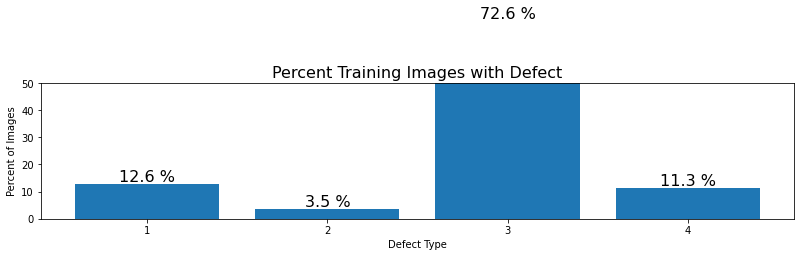

In [16]:
plt.figure(figsize=(13.5,2.5))
bar = plt.bar( [1,2,3,4],100*np.mean( train2.iloc[:,1:5]!='',axis=0) )
plt.title('Percent Training Images with Defect', fontsize=16)
plt.ylabel('Percent of Images'); plt.xlabel('Defect Type')
plt.xticks([1,2,3,4])
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f %%' % height,
             ha='center', va='bottom',fontsize=16)
plt.ylim((0,50)); plt.show()

Images and masks from our Data Generator
KEY: yellow=defect1, green=defect2, blue=defect3, magenta=defect4


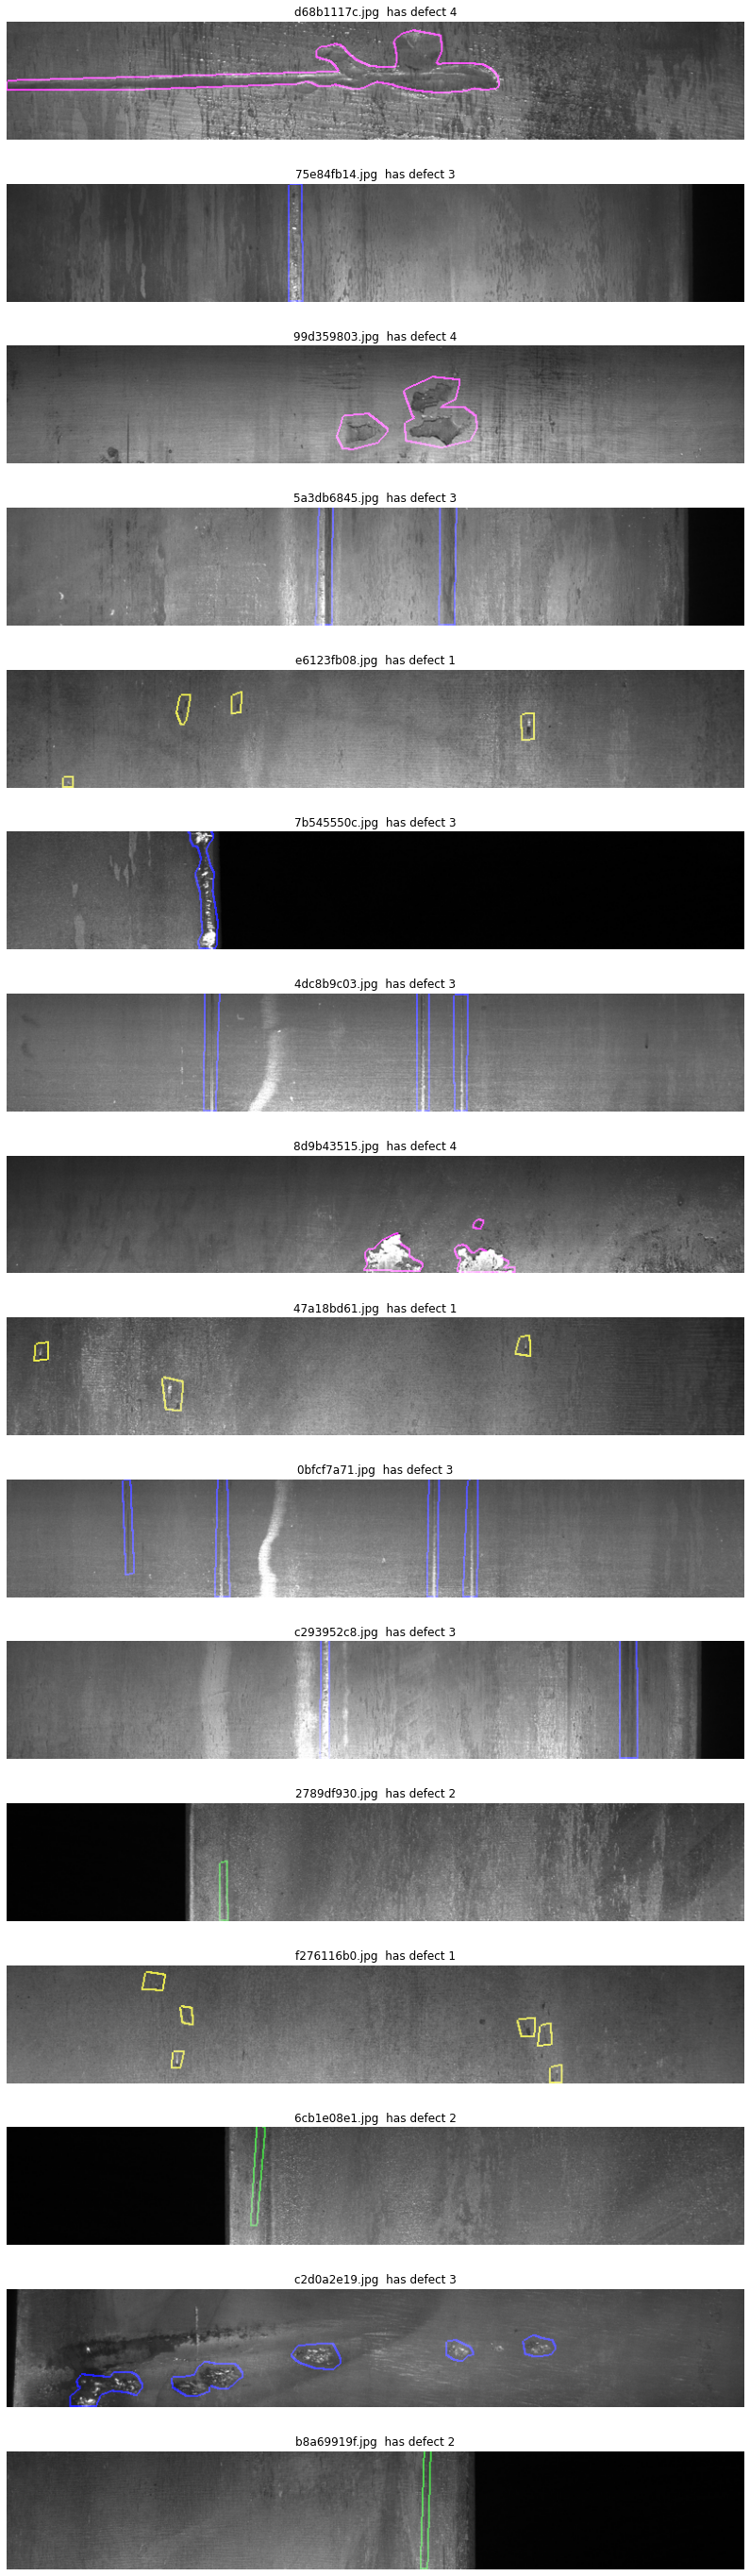

In [17]:
filenames = {}
defects = list(train2[train2['e1']!=''].sample(3).index)
defects += list(train2[train2['e2']!=''].sample(3).index)
defects += list(train2[train2['e3']!=''].sample(7).index)
defects += list(train2[train2['e4']!=''].sample(3).index)

# DATA GENERATOR
train_batches = DataGenerator(train2[train2.index.isin(defects)],shuffle=True,info=filenames)
print('Images and masks from our Data Generator')
print('KEY: yellow=defect1, green=defect2, blue=defect3, magenta=defect4')

# DISPLAY IMAGES WITH DEFECTS
for i,batch in enumerate(train_batches):
    plt.figure(figsize=(14,50)) #20,18
    for k in range(16):
        plt.subplot(16,1,k+1)
        img = batch[0][k,]
        img = Image.fromarray(img.astype('uint8'))
        img = np.array(img)
        extra = '  has defect'
        for j in range(4):
            msk = batch[1][k,:,:,j]
            msk = mask2pad(msk,pad=3)
            msk = mask2contour(msk,width=2)
            if np.sum(msk)!=0: extra += ' '+str(j+1)
            if j==0: # yellow
                img[msk==1,0] = 235 
                img[msk==1,1] = 235
            elif j==1: img[msk==1,1] = 210 # green
            elif j==2: img[msk==1,2] = 255 # blue
            elif j==3: # magenta
                img[msk==1,0] = 255
                img[msk==1,2] = 255
        plt.title(filenames[16*i+k]+extra)
        plt.axis('off') 
        plt.imshow(img)
    plt.subplots_adjust(wspace=0.05)
    plt.show()

In [18]:
! pip install segmentation-models
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 8.3 MB/s 


In [19]:
from keras import backend as K

# COMPETITION METRIC
def dice_coef(y_true, y_pred, smooth=1):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

In [22]:
from segmentation_models import Unet
from segmentation_models import get_preprocessing
import segmentation_models as sm
#sm.set_framework('tf.keras')
#sm.framework()

# LOAD UNET WITH PRETRAINING FROM IMAGENET
preprocess = get_preprocessing('resnet50') # for resnet, img = (img-110.0)/1.0
model = Unet('resnet50', input_shape=(128, 800, 3), classes=4, activation='sigmoid')
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=[dice_coef])

# TRAIN AND VALIDATE MODEL
idx = int(0.8*len(train2)); print()
train_batches = DataGenerator(train2.iloc[:idx],shuffle=True,preprocess=preprocess)
valid_batches = DataGenerator(train2.iloc[idx:],preprocess=preprocess)
history = model.fit_generator(train_batches, validation_data = valid_batches, epochs = 20, verbose=2)


Epoch 1/20
354/354 - 253s - loss: 0.0808 - dice_coef: 0.2226 - val_loss: 0.0887 - val_dice_coef: 0.2316 - 253s/epoch - 714ms/step
Epoch 2/20
354/354 - 246s - loss: 0.0327 - dice_coef: 0.3790 - val_loss: 0.0470 - val_dice_coef: 0.3720 - 246s/epoch - 695ms/step
Epoch 3/20
354/354 - 246s - loss: 0.0299 - dice_coef: 0.4222 - val_loss: 0.0579 - val_dice_coef: 0.2902 - 246s/epoch - 696ms/step
Epoch 4/20
354/354 - 246s - loss: 0.0276 - dice_coef: 0.4579 - val_loss: 0.0504 - val_dice_coef: 0.4099 - 246s/epoch - 694ms/step
Epoch 5/20
354/354 - 246s - loss: 0.0266 - dice_coef: 0.4719 - val_loss: 0.0252 - val_dice_coef: 0.5042 - 246s/epoch - 694ms/step
Epoch 6/20
354/354 - 246s - loss: 0.0256 - dice_coef: 0.4886 - val_loss: 0.0836 - val_dice_coef: 0.2741 - 246s/epoch - 694ms/step
Epoch 7/20
354/354 - 245s - loss: 0.0248 - dice_coef: 0.4978 - val_loss: 0.1183 - val_dice_coef: 0.2269 - 245s/epoch - 693ms/step
Epoch 8/20
354/354 - 246s - loss: 0.0238 - dice_coef: 0.5134 - val_loss: 0.0311 - val_dic